# **Automatidata - Machine Learning Models**

The project goal is to predict the fare to benefit drivers with more revenue. We start by framing the model objective as predicting people who are generous customers i.e. who will tip 20% or more. This could be set as the target variable.

In [8]:
# Import packages and libraries
import numpy as np
import pandas as pd

# import packages for preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

# import models
from sklearn.ensemble  import RandomForestClassifier
from xgboost import XGBClassifier

# import metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# import feature importance plot
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Show all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the regression analysis called nyc_preds_means.csv.

In [10]:
# Load dataset into dataframe
df0 = pd.read_csv('C:\\Users\\mukhe\\Desktop\\Data_Analytics\\Projects\\Datasets\\2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('C:\\Users\\mukhe\\Desktop\\Data_Analytics\\Projects\\Datasets\\nyc_preds_means.csv')

In [11]:
# Display first few rows of df0
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [14]:
# Display first few rows of `nyc_preds_means`
nyc_preds_means.drop(columns=['Unnamed: 0'], inplace=True)
nyc_preds_means.head(10)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
5,11.855376,2.052258,10.441351
6,59.633333,12.830000,45.374542
7,26.437500,4.022500,18.555128
8,7.873457,1.019259,7.151511
9,10.541111,1.580000,9.122755


In [15]:
# Merge datasets
df0 = pd.concat([df0,nyc_preds_means], axis=1)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


## More Feature Engineering

In [16]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

From EDA and Hypothesis test conducted, we know that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, we'll need to sample the data to select only the customers who pay with credit card. 

In [18]:
# Subset the data to isolate only customers who paid by credit card
df1 = df0.copy()
df1 = df1[df1['payment_type']==1]
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351


In [19]:
# Create tip % col
df1['tip_percent'] = round(df1['tip_amount']/(df1['total_amount']-df1['tip_amount']),3)
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200


Now, let's create another column called `generous`. This will be the target variable. The column will be a binary indicator of whether or not a customer tipped >= 20% (0=no, 1=yes).

In [20]:
# Create 'generous' col (target)
df1['generous'] = [True if tip >= 0.2 else False for tip in df1['tip_percent']]
df1['generous'] = df1['generous'].astype(int)
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1


In [23]:
# Convert pickup and dropoff cols to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [24]:
# Create a 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday


#### Create time of day columns

Next, let's engineer four new columns that represent time of day. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

In [25]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

In [26]:
# Define 'am_rush()' conversion function (06:00–10:00)
def am_rush(data):
    if 6 <= data['am_rush'] < 10:
        value = 1
    else:
        value = 0
    return value        

In [27]:
# Apply 'am_rush' function to the 'am_rush' series
df1['am_rush'] = df1.apply(am_rush, axis=1)

In [29]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime(data):
    if 10 <= data['daytime'] < 16:
        value = 1
    else:
        value = 0
    return value

In [30]:
# Apply 'daytime()' function to the 'daytime' series
df1['daytime'] = df1.apply(daytime, axis=1)

In [31]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush(data):
    if 16 <= data['pm_rush'] < 20:
        value = 1
    else:
        value = 0
    return value

In [32]:
# Apply 'pm_rush()' function to the 'pm_rush' series
df1['pm_rush'] = df1.apply(pm_rush, axis=1)
df1['pm_rush'].head()

0    0
1    0
2    0
3    0
5    0
Name: pm_rush, dtype: int64

In [33]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(data):
    if 20 <= data['nighttime'] < 24:
        value = 1
    elif 0 <= data['nighttime'] < 6:
        value = 1
    else:
        value = 0
    return value

In [34]:
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1.apply(nighttime, axis=1)

#### Create `month` column

In [35]:
# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name().str.lower()

In [36]:
# DIsplay few rows
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,1,0,0,0,march
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,0,1,0,0,april
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,1,0,0,0,december
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday,0,0,0,1,march


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed.

In [37]:
# Drop columns
df1 = df1.drop(columns=['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 
                        'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                        'improvement_surcharge', 'total_amount', 'tip_percent'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int32  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int32(1), int64(9), object(2)
memory usage: 1.8+ MB


### Data Preprocessing

Some of the columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

In [38]:
# Define list of cols to convert to string
cols_to_str = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID']

# Convert each column to string
for cols in cols_to_str:
    df1[cols] = df1[cols].astype(str)

In [39]:
# Convert categoricals to binary
df2 = pd.get_dummies(df1, drop_first=True)

In [70]:
# Get class balance of 'generous' col
df2['generous'].value_counts(normalize=True)

1    0.526368
0    0.473632
Name: generous, dtype: float64

The dataset is very nearly balanced.

Before building a model, let's decide on the evaluation metric.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more, even when the original customer would have tipped generously.

The stakes are relatively even. We want to help taxi drivers make more money, but we don't want this to anger customers. Your metric should weigh both precision and recall equally. Therefore, we use F1 score which is the harmonic mean of both precision and recall.

### Data Modeling

In [40]:
# Isolate target variable (y)
y = df2['generous']

# Isolate the features (X)
X = df2.drop(columns=['generous'], axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Random forest

In [57]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth':[2, 4, 10],
             'max_features':[6, 10, 14],
             'max_samples':[0.5, 0.9],
             'min_samples_leaf':[1, 5],
             'min_samples_split':[2, 5],
             'n_estimators':[150, 300]}

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
grid = GridSearchCV(rf,
                    cv_params,
                    scoring=scoring,
                    cv=5,
                    n_jobs=-1,
                    refit='f1')

In [58]:
%%time
grid.fit(X_train, y_train)

Wall time: 2min 4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10], 'max_features': [6, 10, 14],
                         'max_samples': [0.5, 0.9], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [150, 300]},
             refit='f1', scoring={'recall', 'f1', 'precision', 'accuracy'})

In [59]:
import pickle as pkl

# Define a path to the folder where you want to save the model
path = 'C:\\Users\\mukhe\\Desktop\\Data_Analytics\\Projects\\Python_Pickle_files\\'

In [60]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pkl', 'wb') as to_write:
        pkl.dump(model_object, to_write)

In [61]:
write_pickle(path, grid, 'ad_rf_cv')

In [62]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pkl', 'rb') as to_read:
        model = pkl.load(to_read)

        return model

In [63]:
grid = read_pickle(path, 'ad_rf_cv')

In [64]:
# Examine best score
grid.best_score_

0.7458946249803845

In [65]:
grid.best_params_

{'max_depth': 4,
 'max_features': 14,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 300}

In [70]:
# Helper funtion to get results as a DataFrame
def make_results(model_name:str, model_object):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    
    Out:
    table: pandas df of scores

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [71]:
rf_cv_results = make_results('RandomForest_CV', grid)
rf_cv_results

,model,precision,recall,F1,accuracy
0,RandomForest_CV,0.685717,0.817786,0.745895,0.706761


In [72]:
# Get scores on test data
rf_preds = grid.best_estimator_.predict(X_test)

In [73]:
# Helper function to get the test scores
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

###### RF test results

In [74]:
 # Get scores on test data
rf_test_scores = get_test_scores('RandomForest_CV_test', rf_preds, y_test)
results = pd.concat([rf_cv_results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RandomForest_CV,0.685717,0.817786,0.745895,0.706761
0,RandomForest_CV_test,0.691577,0.833748,0.756037,0.716793


The test results are almost equal to the cross-validation results as the validation F1 score is 0.745 where as the test F1 score is 0.756.

##### XGBoost

In [75]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth':[4, 10],
             'min_child_weight':[3, 5],
             'learning_rate':[0.1, 0.3],
             'n_estimators':[100, 300]}

# Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring=scoring,
                      cv=5,
                      n_jobs=-1,
                      refit='f1') 

In [76]:
%%time
xgb_cv.fit(X_train, y_train)

Wall time: 7min 17s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [77]:
write_pickle(path, xgb_cv, 'ad_xgb_cv')

In [78]:
xgb_cv = read_pickle(path, 'ad_xgb_cv')

In [79]:
# Examine best score
xgb_cv.best_score_ 

0.7424159806972475

In [80]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 100}

##### XGB CV Results

In [81]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGBoost_CV', xgb_cv)
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RandomForest_CV,0.685717,0.817786,0.745895,0.706761
0,RandomForest_CV_test,0.691577,0.833748,0.756037,0.716793
0,XGBoost_CV,0.691920,0.801025,0.742416,0.707460


In [82]:
# Get scores on test data
xgb_preds = xgb_cv.best_estimator_.predict(X_test)

###### XGB test results

In [83]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGBoost_CV_test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RandomForest_CV,0.685717,0.817786,0.745895,0.706761
0,RandomForest_CV_test,0.691577,0.833748,0.756037,0.716793
0,XGBoost_CV,0.691920,0.801025,0.742416,0.707460
0,XGBoost_CV_test,0.695524,0.819811,0.752570,0.716269


From the test and cross-validation results, Random Forest classifier stood out as a champion model as it performed better with an F1 score of 0.756 and Recall 0.833.

Plot a confusion matrix of the model's predictions on the test data.

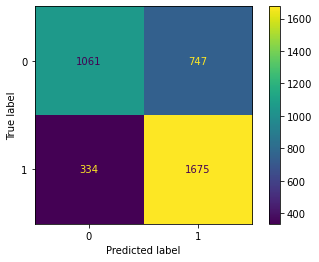

In [84]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=grid.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
disp.plot(values_format='')

False positives are more common than the False negatives i.e. customer will not give a tip but they actually will tip.

##### Feature importance

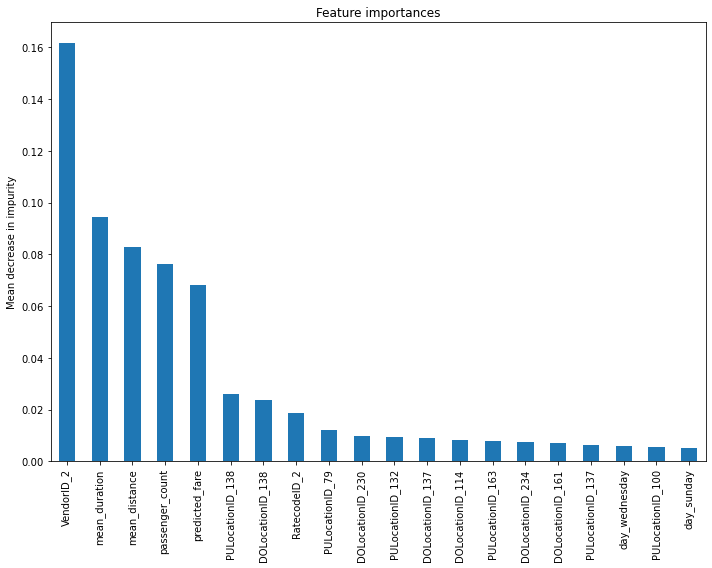

In [85]:
feature_importance = grid.best_estimator_.feature_importances_
rf_feature_importances = pd.Series(feature_importance, index=X_test.columns)
rf_feature_importances = rf_feature_importances.sort_values(ascending=False)[:20]

fig, ax = plt.subplots(figsize=(10,8))
rf_feature_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

### Conclusion

1. The Random Forest produced decent results as we could observe the F1 score is 0.756 and recall is 0.83 which indicates low false negatives. We could further test this model and could improve it by ingesting more data or deeper feature engineering.

2. Random Forests are hard to interpret. While decision trees decide feature importance by methods like gini impurity, entropy and information gain, random forests choose features randomly. `VendorID` emerged as a surprise feature. 

3.  Apart from obvious features, we could derive more like is a customer likely to tip based on the mean trip distance, also how much a person could tip based on the short and long distances. This could provide more info to a driver that how likely is a customer going to tip based on the trip distance.

4. We excluded the customers with cash as we have less information about the tips of the customers who paid through cash. If we could get accurate info of the cash tips we could improve the model with efficient predictions.